In [1]:
#case study telecom_churn.csv
'''Telecom customer Defection Analysis 
Customer Churn also known as customer defection , is the loss of clients 
or customers.

Telephone service companies often use customer churn analysis  and customer
churning rates as one of their key business metrices .

For this project , we will be exploring the dataset of a telecom company and
try to predict the customer churn .using the method of classification ,
classify whether or not the customer will churn. 

Loss of customer can effect the business .It is very imp aspect '''

'Telecom customer Defection Analysis \nCustomer Churn also known as customer defection , is the loss of clients \nor customers.\n\nTelephone service companies often use customer churn analysis  and customer\nchurning rates as one of their key business metrices .\n\nFor this project , we will be exploring the dataset of a telecom company and\ntry to predict the customer churn .using the method of classification ,\nclassify whether or not the customer will churn. \n\nLoss of customer can effect the business .It is very imp aspect '

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load dataset
df=pd.read_csv("C:/Users/arohi/.jupyter/telecom_churn.csv") #df user defined object or dataframe

In [4]:
#To show first five records
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
pd.set_option('display.max_columns',None)#to show all columns

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#check null values in our dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df["TotalCharges"].value_counts() #to check the value of TotalCharges column

           11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
1511.2      1
89.1        1
5614.45     1
6079        1
1742.45     1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
#replace space with null values in TotalCharges column  permanently means 
#inplace=True
df["TotalCharges"].replace(" ",np.nan,inplace=True)  

In [11]:
df.isnull().sum() #check null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
#to change the datatype of TotalCharges column in float 
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
#check % of null values of TotalCharges  column
df["TotalCharges"].isnull().sum()/df.shape[0]*100

0.1561834445548772

In [16]:
#fill of null values of TotalCharges column with help of mean or median
#permanently 
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
#Remove unwanted column permanent
df.drop("customerID",axis=1,inplace=True)

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

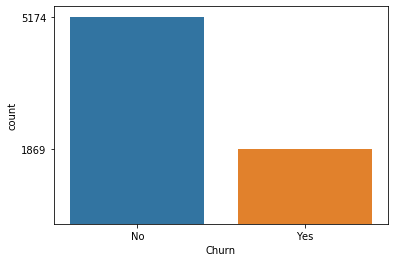

In [22]:
#visualize 
sns.countplot(data=df,x="Churn")
c=df["Churn"].value_counts()
plt.yticks(c)
plt.show()

In [23]:
# separate all object features(columns) and numeric features (column)
df_cat=df.select_dtypes('object')
df_num=df.select_dtypes(['int64','float64'])

In [24]:
df_cat.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
#create the object of LabelEncoder class le
le=LabelEncoder()
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])

In [26]:
#to join both numeric and categorical dataframe in new dataframe df_new
df_new=pd.concat([df_num,df_cat],axis=1)

In [27]:
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [28]:
#WE train the model with classification algo. because we have to predict
#(Yes/No) means target variable : Churn

In [29]:
#separate input features (independent variable)and output features(target)
X=df_new.drop("Churn",axis=1)
Y=df_new["Churn"]

In [30]:
#train_test_split()  : 70% & 30%
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [32]:
#Base Line model Logistic Regression 

In [33]:
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    return model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [35]:
#create the object of Logistic Regression 
lr=LogisticRegression()

In [36]:
create_model(lr) #call function

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



LogisticRegression()

In [37]:
#in Logistic regression , recall is good but  recall is not better

In [38]:
#use second algorithm of classification : - 2. DecisionTreeClassifier
#DTC  help to select imp features with the help of gini index /entropy

In [39]:
#call class  DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
#create object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier() #bydefault gini index 

In [41]:
#call function
create_model(dt1)

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1585
           1       0.47      0.52      0.49       528

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.66      2113
weighted avg       0.74      0.73      0.74      2113



DecisionTreeClassifier()

In [42]:
#to show imp features (input)
dt1.feature_importances_

array([0.01734387, 0.13615979, 0.18686174, 0.20734142, 0.03234457,
       0.02501401, 0.01001088, 0.00435554, 0.01819443, 0.01075748,
       0.04318496, 0.01659313, 0.01792797, 0.01984712, 0.00847381,
       0.01154452, 0.16164358, 0.02153313, 0.05086805])

In [43]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [44]:
#here recall is not better because model is overfit

In [45]:
#call a decision tree
features=X.columns

In [46]:
#call tree class
from sklearn import tree

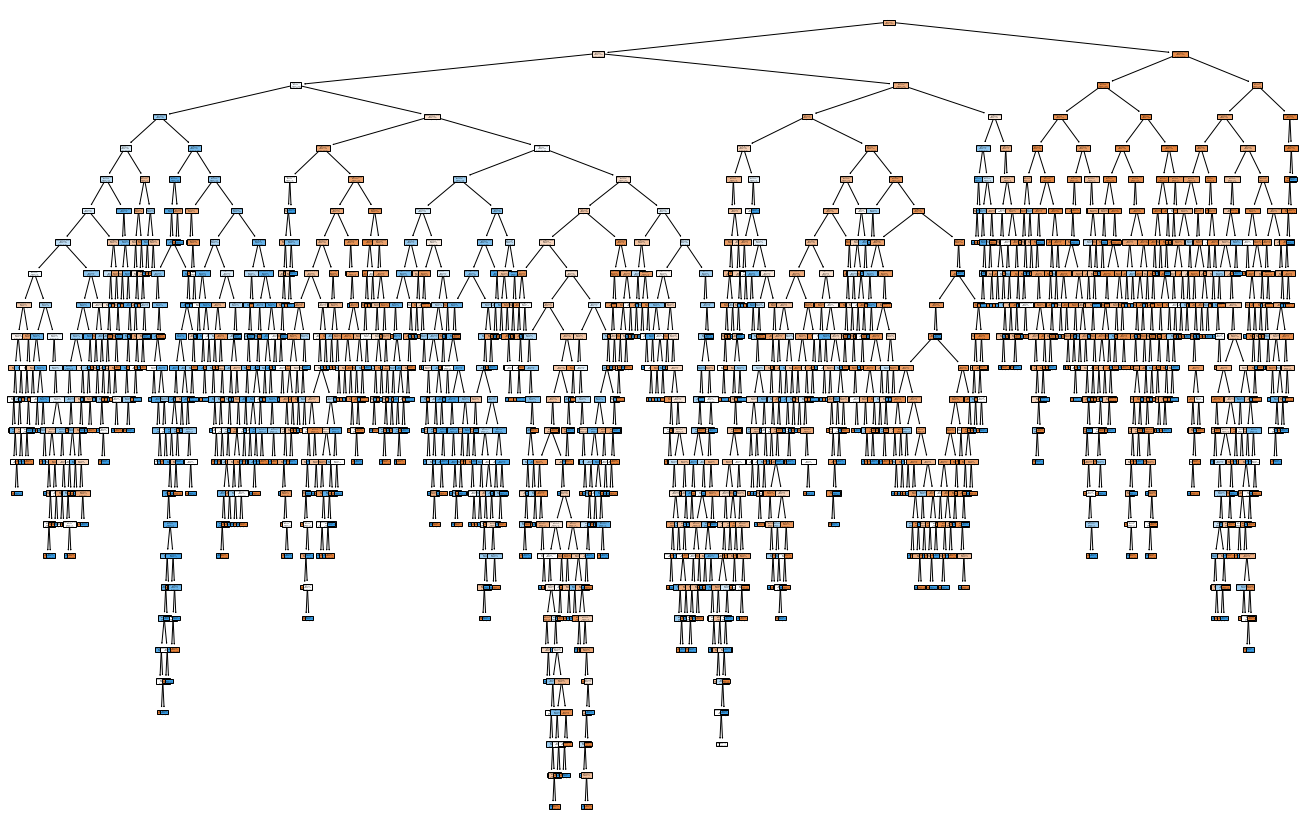

In [47]:
fig=plt.figure(figsize=(23,15))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [48]:
# Use Pruning Techniques : to reduced overfit  
#1. max_depth (to cut the braches of tree) max_depth<=8 means not more than 8
#create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(max_depth=2) #bydefault gini index 

In [49]:
#call function
create_model(dt2)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1585
           1       0.50      0.75      0.60       528

    accuracy                           0.75      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.75      0.77      2113



DecisionTreeClassifier(max_depth=2)

In [50]:
#to show imp features (input)
dt2.feature_importances_

array([0.        , 0.        , 0.02956213, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.19101367, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.77942421, 0.        , 0.        ])

In [51]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

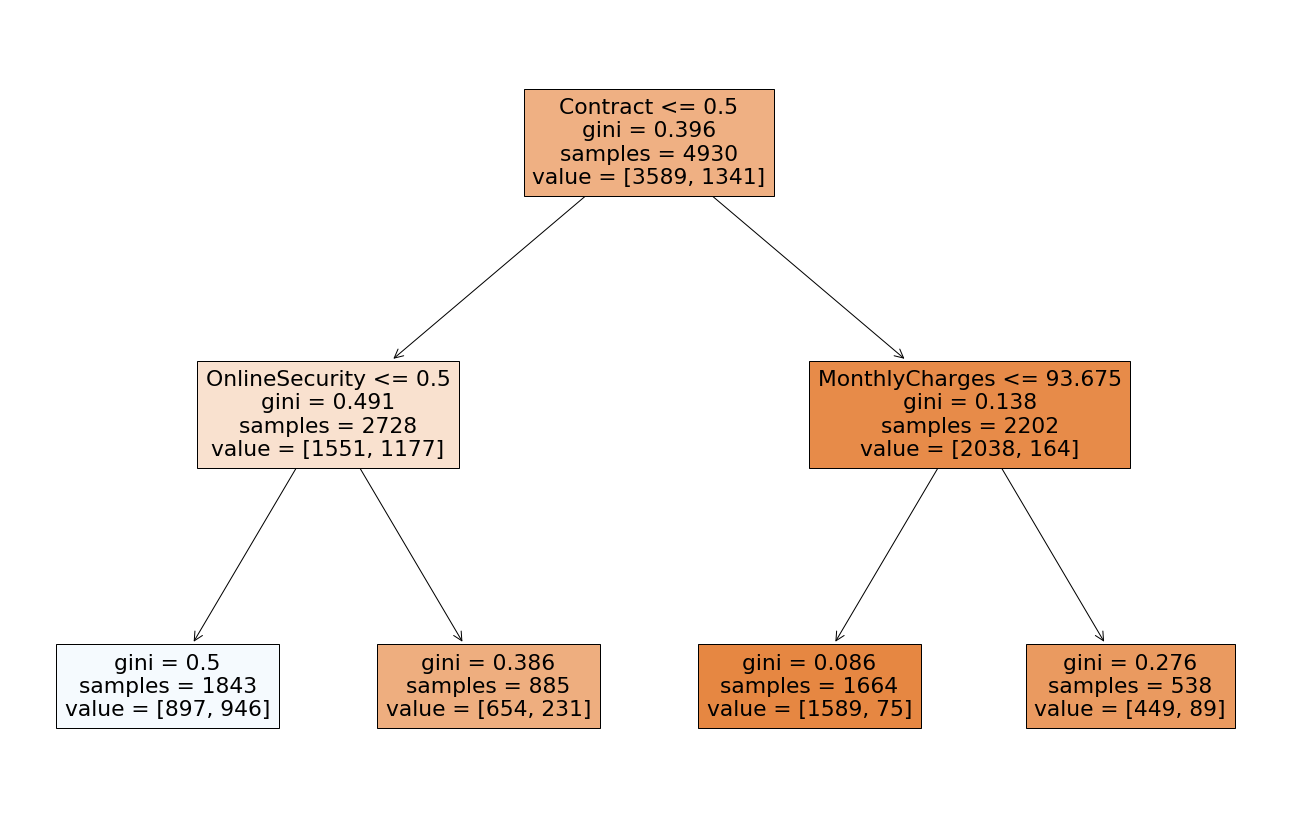

In [52]:
#Draw a tree
fig=plt.figure(figsize=(23,15))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [53]:
#overfit reduced
#recall=0.75 it is good bot not better

In [54]:
#use second pruning tech.  min_samples_leaf
dt3=DecisionTreeClassifier(min_samples_leaf=50) #gini index
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1585
           1       0.64      0.51      0.57       528

    accuracy                           0.81      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.80      0.81      0.80      2113



In [55]:
#entropy tech
#use second pruning tech.  min_samples_leaf
dt4=DecisionTreeClassifier(min_samples_leaf=45,criterion='entropy') 
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1585
           1       0.63      0.51      0.56       528

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.80      2113



In [56]:
#conclusion recall=75%  use pruning tech. max_depth=2 

In [57]:
#Use Ensembling Technique :-
#RandomForestTree : this is the type of Bootstraping 
from sklearn.ensemble import RandomForestClassifier

In [58]:
#Create the object of RandomForestClassifier class
rf=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)
#max_features not more than 10 

In [59]:
#call function
create_model(rf)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1585
           1       0.63      0.50      0.56       528

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



RandomForestClassifier(max_features=10, n_estimators=10, random_state=1)

In [60]:
#recall is not good

In [61]:
#ADA BOOST (ensembling tech)
from sklearn.ensemble import AdaBoostClassifier

In [62]:
ada=AdaBoostClassifier(n_estimators=100)  #not more than 100 use DT
#call function
create_model(ada)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1585
           1       0.64      0.58      0.61       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



AdaBoostClassifier(n_estimators=100)

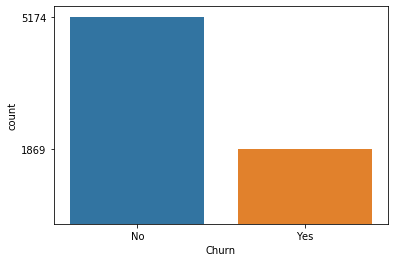

In [63]:
#sampling Technique use  when data is imbalance
sns.countplot(data=df,x="Churn")
c=df["Churn"].value_counts()
plt.yticks(c)
plt.show()

In [64]:
#sampling Technique because data is imbalance 
''' There are basically 2 types of Sampling technique 
    1. Oversampling Tech.
    2. UnderSampling Tech.
    
    Exact meaning of that
    For example : - suppose we have 2 class
    1. yes  and 2. no
    suppose here yes is very low suppose somewhere around 10 (Minority class)
     and no is very high suppose somewhere around 1000 (Majority class)
     We can see that the proportion of yes is very less 
     so what we can do it ,We can create duplicate yes values so that they 
     become equal that stays still need 1000
     10-->yes values ,we need 990 yes values more so in that case we can 
     make it yes-1000. 
     What have those 990 values,all of those duplicate values .This 
     Technique is known as Over sampling Technique.'''

'''In other ways , Instead of increasing the Minority class why not reduced
the Majority class and reduction is very simple , Users delete the rows that
all so we delete 990 rows , then remain no only 10 rows  again those two 
are balanced abd this technique is known as Under Sampling tech.'''

'In other ways , Instead of increasing the Minority class why not reduced\nthe Majority class and reduction is very simple , Users delete the rows that\nall so we delete 990 rows , then remain no only 10 rows  again those two \nare balanced abd this technique is known as Under Sampling tech.'

In [65]:
''' If you have basically reducing the majority class that is known 
as Under Sampling tech. 
and if you are increasing the minority class that is known as Over sampling 
Technique.'''

' If you have basically reducing the majority class that is known \nas Under Sampling tech. \nand if you are increasing the minority class that is known as Over sampling \nTechnique.'

In [66]:
#!pip install imblearn

In [67]:
#1. RandomOverSampler tech.
from imblearn.over_sampling import RandomOverSampler

In [68]:
#Oversampler
#create object of  RandomOverSampler() class
ros = RandomOverSampler()

In [69]:
pd.Series(Y_train).value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [70]:
#not apply Over sampler

In [71]:
#create a duplicates rows of yes class 
#fit_sample() inbuilt method of RandomOverSampler class
X_sample1,Y_sample1 = ros.fit_sample(X_train,Y_train)

In [72]:
pd.Series(Y_test).value_counts() #not apply Over sampler

0    1585
1     528
Name: Churn, dtype: int64

In [73]:
#create a duplicates rows of yes class of 30% testing data
#fit_sample() inbuilt method of RandomOverSampler class
X_sample_test,Y_sample_test = ros.fit_sample(X_test,Y_test)

In [74]:
#apply  over sampler on testing test
pd.Series(Y_sample_test).value_counts()

1    1585
0    1585
Name: Churn, dtype: int64

In [75]:
##Train the model after balance dataset with the help of Logistic Regression
#create the object of LogisticRegression class
lr1=LogisticRegression()

In [76]:
#train the model (70% data after apply over sampler)
lr1.fit(X_sample1,Y_sample1)

LogisticRegression()

In [77]:
#test the model after apply over sampler (30% data)
Y_pred1=lr1.predict(X_sample_test)

In [78]:
#show report
print(classification_report(Y_sample_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1585
           1       0.75      0.80      0.77      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170



In [79]:
#recall =0.58 before OverSampler but after apply over sampler than recall=0.82
#use Logistic regression

In [80]:
#after apply over sampler use RandomForestClassifier 
#Create the object of RandomForestClassifier class
rf1=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)
#max_features not more than 10

In [81]:
##Train the model after balance dataset use fit method()
rf1.fit(X_sample1,Y_sample1)

RandomForestClassifier(max_features=10, n_estimators=10, random_state=1)

In [82]:
#test the model after balance dataset use predict() method
Y_pred2=rf1.predict(X_sample_test)

In [83]:
#show report
print(classification_report(Y_sample_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.86      0.76      1585
           1       0.81      0.58      0.68      1585

    accuracy                           0.72      3170
   macro avg       0.74      0.72      0.72      3170
weighted avg       0.74      0.72      0.72      3170



In [84]:
#create the object of DecisionTreeClassifier with max_depth
dt6=DecisionTreeClassifier(max_depth=4)

In [85]:
#train the model
dt6.fit(X_sample1,Y_sample1)

DecisionTreeClassifier(max_depth=4)

In [86]:
#test the model
Y_pred3=dt6.predict(X_sample_test)

In [87]:
#show report
print(classification_report(Y_sample_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1585
           1       0.75      0.79      0.77      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170



In [88]:
#Random Under Sampler (here we do majority class converts into minority class
#means delete row of no randomly )
#2. RandomUnderSampler tech.
from imblearn.under_sampling import RandomUnderSampler

In [89]:
#Undersampler
#create object of  RandomUnderSampler() class
rus = RandomUnderSampler()

In [90]:
#training data not apply under sampler
pd.Series(Y_train).value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [91]:
#Testing data not apply under sampler
pd.Series(Y_test).value_counts() 

0    1585
1     528
Name: Churn, dtype: int64

In [92]:
#Delete a  rows randomly of no class of 70% training  data
#fit_sample() inbuilt method of RandomUnderSampler class
X_sample2,Y_sample2 = rus.fit_sample(X_train,Y_train) 

In [93]:
#Delete a  rows randomly of no class  of 30% testing data
#fit_sample() inbuilt method of RandomUnderSampler class
X_sample_test1,Y_sample_test1 = rus.fit_sample(X_test,Y_test)

In [94]:
#training data  after apply under sampler
pd.Series(Y_sample2).value_counts() 

1    1341
0    1341
Name: Churn, dtype: int64

In [95]:
#Testing data after apply under sampler
pd.Series(Y_sample_test1).value_counts() 

1    528
0    528
Name: Churn, dtype: int64

In [96]:
##Train the model after balance dataset with the help of Logistic Regression
#create the object of LogisticRegression class
lr2=LogisticRegression()

In [97]:
#Train the model after balance dataset use fit method()
lr2.fit(X_sample2,Y_sample2)

LogisticRegression()

In [98]:
#test the model after apply under sampler (30% data)
Y_pred3=lr2.predict(X_sample_test1)

In [99]:
#show report
print(classification_report(Y_sample_test1,Y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       528
           1       0.75      0.81      0.78       528

    accuracy                           0.77      1056
   macro avg       0.77      0.77      0.77      1056
weighted avg       0.77      0.77      0.77      1056



In [100]:
#RandonOversampler of Logistic reg. Recall=0.82
#RandomUndersampler of Logistic reg. Recall=0.80

In [101]:
#Apply ensembling tech. 
#ADA Boost  (undersampler data)
from sklearn.ensemble import AdaBoostClassifier

In [102]:
#create object of AdaBoostClassifier class
ada=AdaBoostClassifier()

In [103]:
#train the model on balance training data w.t.o RandomUnderSampler class
ada.fit(X_sample2,Y_sample2)

AdaBoostClassifier()

In [104]:
#testing the model with balanced data
y_pred=ada.predict(X_sample_test1)

In [105]:
#generate report
print(classification_report(Y_sample_test1,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       528
           1       0.75      0.82      0.78       528

    accuracy                           0.77      1056
   macro avg       0.78      0.77      0.77      1056
weighted avg       0.78      0.77      0.77      1056



In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=10) #not more than 10

In [108]:
#train the model on balance training data w.t.o RandomUnderSampler class
gbc.fit(X_sample2,Y_sample2)

GradientBoostingClassifier(n_estimators=10)

In [109]:
#testing the model with balanced data
y_pred=gbc.predict(X_sample_test1)

In [110]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=10) #not more than 10

In [111]:
#generate report
print(classification_report(Y_sample_test1,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       528
           1       0.73      0.83      0.77       528

    accuracy                           0.76      1056
   macro avg       0.76      0.76      0.76      1056
weighted avg       0.76      0.76      0.76      1056

